In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("raw/traffic.csv")
df.head(20)

,traffic_id,date_time,city,area,vehicle_count,avg_speed_kmh,accident_count,congestion_level,road_condition,visibility_m
0,1.0,TBD,NaN,Kensington,2086.0,27.103947,6.0,NaN,Wet,7969.0
1,2.0,TBD,London,Southwark,4629.0,80.635814,1.0,Low,NaN,7306.0
2,3.0,2024-01-01T02:00Z,NaN,Southwark,3109.0,89.057949,0.0,High,Wet,4735.0
3,4.0,NaN,NaN,NaN,3563.0,-18.832491,2.0,Medium,Dry,8288.0
4,5.0,01/01/2024 04AM,London,NaN,3748.0,107.906517,2.0,NaN,Snowy,8711.0
5,6.0,01/01/2024 05AM,London,Southwark,3133.0,-8.291384,6.0,High,NaN,6664.0
6,7.0,2024-01-01 06:00,London,Chelsea,1424.0,NaN,8.0,Low,Snowy,2777.0
7,8.0,2024-01-01T07:00Z,London,Kensington,3218.0,95.727944,6.0,Medium,Snowy,6887.0
8,9.0,2024-01-01 08:00,NaN,Kensington,259.0,88.980060,1.0,High,Dry,1372.0
9,NaN,01/01/2024 09AM,London,Chelsea,1404.0,36.028368,1.0,Medium,Dry,3294.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5050 entries, 0 to 5049
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   traffic_id        4900 non-null   float64
 1   date_time         4896 non-null   object 
 2   city              2492 non-null   object 
 3   area              4046 non-null   object 
 4   vehicle_count     4897 non-null   float64
 5   avg_speed_kmh     4899 non-null   float64
 6   accident_count    4898 non-null   float64
 7   congestion_level  3637 non-null   object 
 8   road_condition    3971 non-null   object 
 9   visibility_m      4897 non-null   float64
dtypes: float64(5), object(5)
memory usage: 394.7+ KB


In [4]:
df.duplicated().sum()

50

In [5]:
df = df.drop_duplicates().reset_index(drop=True)


In [6]:
df["traffic_id"] = df["traffic_id"].fillna(pd.Series(df.index + 1, index=df.index))

In [7]:
df["date_time"].unique()[:100]

array(['TBD', '2024-01-01T02:00Z', nan, '01/01/2024 04AM',
       '01/01/2024 05AM', '2024-01-01 06:00', '2024-01-01T07:00Z',
       '2024-01-01 08:00', '01/01/2024 09AM', '2024-01-01T10:00Z',
       '01/01/2024 11AM', '2024-01-01T12:00Z', '01/01/2024 01PM',
       '2099-00-00 99:99', '01/01/2024 03PM', '2024-01-01T16:00Z',
       '01/01/2024 05PM', '2024-01-01T19:00Z', '01/01/2024 09PM',
       '2024-01-01T22:00Z', '2024-01-02 01:00', '2024-01-02 02:00',
       '2024-01-02 04:00', '02/01/2024 05AM', '2024-01-02T07:00Z',
       '2024-01-02 08:00', '02/01/2024 09AM', '2024-01-02 10:00',
       '2024-01-02T13:00Z', '02/01/2024 02PM', '02/01/2024 03PM',
       '2024-01-02 17:00', '2024-01-02T18:00Z', '2024-01-02 21:00',
       '2024-01-02T22:00Z', '02/01/2024 11PM', '2024-01-03 01:00',
       '2024-01-03 02:00', '2024-01-03 03:00', '2024-01-03 04:00',
       '2024-01-03 08:00', '2024-01-03T10:00Z', '03/01/2024 11AM',
       '2024-01-03 12:00', '03/01/2024 05PM', '2024-01-03T18:00Z',
     

In [8]:
df.isnull().sum()

traffic_id             0
date_time            150
city                2525
area                1000
vehicle_count        150
avg_speed_kmh        150
accident_count       150
congestion_level    1395
road_condition      1068
visibility_m         150
dtype: int64

In [9]:
df["date_time"] = df["date_time"].str.replace("Z", "", regex=False)

df["date_time"] = df["date_time"].str.replace(r"(?i)(AM|PM)", r" \1", regex=True)

df["date_time"] = df["date_time"].str.replace(r"\s+", " ", regex=True).str.strip()

df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce", dayfirst=True)

C:\Users\Delta\AppData\Local\Temp\ipykernel_21744\881935382.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date_time"] = pd.to_datetime(df["date_time"], errors="coerce", dayfirst=True)


In [10]:
df = df.dropna(subset=["date_time"]).reset_index(drop=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   traffic_id        2951 non-null   float64       
 1   date_time         2951 non-null   datetime64[ns]
 2   city              1441 non-null   object        
 3   area              2345 non-null   object        
 4   vehicle_count     2864 non-null   float64       
 5   avg_speed_kmh     2858 non-null   float64       
 6   accident_count    2861 non-null   float64       
 7   congestion_level  2154 non-null   object        
 8   road_condition    2333 non-null   object        
 9   visibility_m      2868 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 230.7+ KB


In [12]:
df["city"].unique()

array([nan, 'London'], dtype=object)

In [13]:
df["city"] = df["city"].fillna("London")

In [14]:
df["area"].unique

<bound method Series.unique of 0        Southwark
1              NaN
2        Southwark
3          Chelsea
4       Kensington
           ...    
2946        Camden
2947     Islington
2948           NaN
2949     Islington
2950       Chelsea
Name: area, Length: 2951, dtype: object>

In [15]:
df["area"].describe()

count        2345
unique          5
top       Chelsea
freq          496
Name: area, dtype: object

In [16]:
df["area"] = df["area"].fillna("Chelsea")

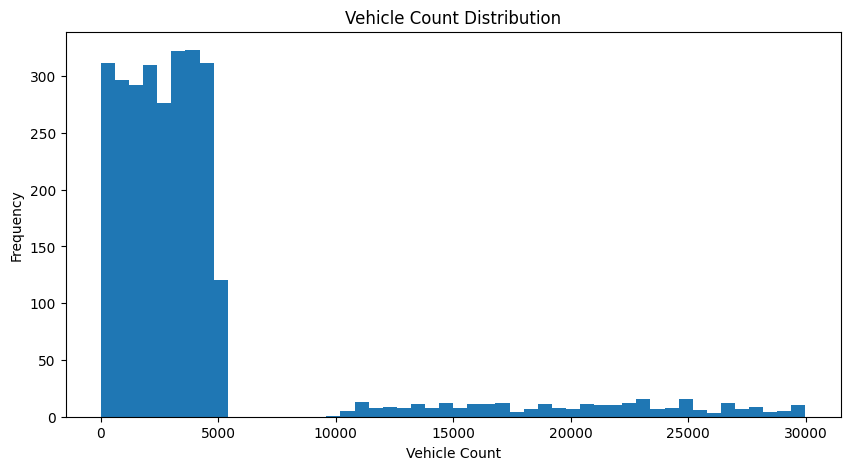

In [17]:
plt.figure(figsize=(10,5))
plt.hist(df["vehicle_count"], bins=50)
plt.title("Vehicle Count Distribution")
plt.xlabel("Vehicle Count")
plt.ylabel("Frequency")
plt.show()

In [18]:
Q1 = df["vehicle_count"].quantile(0.25)
Q3 = df["vehicle_count"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR

median_vc = df["vehicle_count"].median()

df["vehicle_count"] = np.where( df["vehicle_count"] > upper_bound,median_vc,df["vehicle_count"])

df["vehicle_count"] = df["vehicle_count"].fillna(median_vc)


In [19]:
df["avg_speed_kmh"].describe()

count    2858.000000
mean       54.600233
std        38.742993
min       -19.965107
25%        22.529073
50%        55.204460
75%        86.924205
max       119.979634
Name: avg_speed_kmh, dtype: float64

In [20]:
df["avg_speed_kmh"] = df["avg_speed_kmh"].abs()

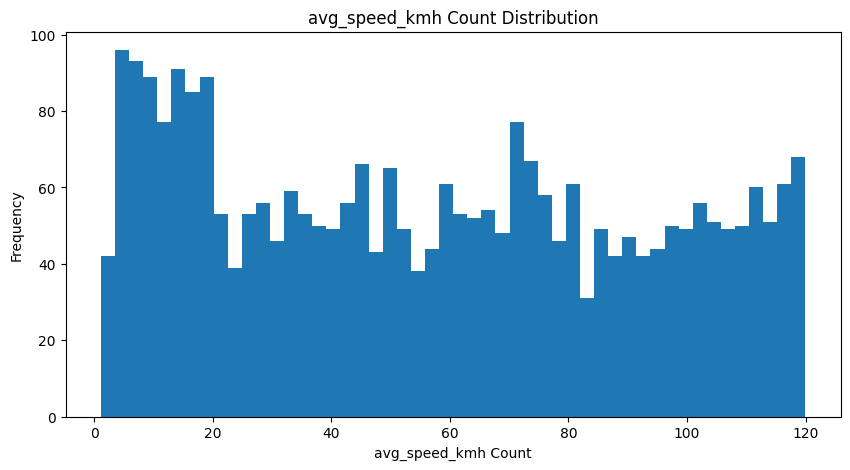

In [21]:
plt.figure(figsize=(10,5))
plt.hist(df["avg_speed_kmh"], bins=50)
plt.title("avg_speed_kmh Count Distribution")
plt.xlabel("avg_speed_kmh Count")
plt.ylabel("Frequency")
plt.show()


In [22]:
median_speed = df["avg_speed_kmh"].median()
df["avg_speed_kmh"] = df["avg_speed_kmh"].fillna(median_speed)

In [23]:
df["accident_count"].describe()

count    2861.000000
mean        6.818595
std         9.604392
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        59.000000
Name: accident_count, dtype: float64

In [24]:
Q1 = df["accident_count"].quantile(0.25)
Q3 = df["accident_count"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
upper_bound


17.0

In [25]:
median_acc = df["accident_count"].median()
df["accident_count"] = np.where(df["accident_count"] > upper_bound,median_acc,df["accident_count"])

df["accident_count"] = df["accident_count"].fillna(median_acc)


In [26]:
df["congestion_level"].describe()

count     2154
unique       3
top        Low
freq       739
Name: congestion_level, dtype: object

In [27]:
df["congestion_level"] = df["congestion_level"].fillna("Low")


In [28]:
df["road_condition"].describe()

count     2333
unique       4
top        Wet
freq       601
Name: road_condition, dtype: object

In [29]:
df["road_condition"] = df["road_condition"].fillna("Wet")

In [30]:
df["visibility_m"].describe()

count     2868.000000
mean      6771.854951
std       8250.973818
min         51.000000
25%       2436.500000
50%       4892.000000
75%       7454.750000
max      49947.000000
Name: visibility_m, dtype: float64

In [31]:
Q1 = df["visibility_m"].quantile(0.25)
Q3 = df["visibility_m"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
upper_bound


14982.125

In [32]:
median_vis = df["visibility_m"].median()

df["visibility_m"] = np.where(df["visibility_m"] > upper_bound,median_vis,df["visibility_m"])

df["visibility_m"] = df["visibility_m"].fillna(median_vis)


In [33]:
df.isnull().sum()

traffic_id          0
date_time           0
city                0
area                0
vehicle_count       0
avg_speed_kmh       0
accident_count      0
congestion_level    0
road_condition      0
visibility_m        0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   traffic_id        2951 non-null   float64       
 1   date_time         2951 non-null   datetime64[ns]
 2   city              2951 non-null   object        
 3   area              2951 non-null   object        
 4   vehicle_count     2951 non-null   float64       
 5   avg_speed_kmh     2951 non-null   float64       
 6   accident_count    2951 non-null   float64       
 7   congestion_level  2951 non-null   object        
 8   road_condition    2951 non-null   object        
 9   visibility_m      2951 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 230.7+ KB


In [35]:
int_cols = ["traffic_id", "vehicle_count", "accident_count", "visibility_m"]
for col in int_cols:
    df[col] = df[col].astype("int64")

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2951 entries, 0 to 2950
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   traffic_id        2951 non-null   int64         
 1   date_time         2951 non-null   datetime64[ns]
 2   city              2951 non-null   object        
 3   area              2951 non-null   object        
 4   vehicle_count     2951 non-null   int64         
 5   avg_speed_kmh     2951 non-null   float64       
 6   accident_count    2951 non-null   int64         
 7   congestion_level  2951 non-null   object        
 8   road_condition    2951 non-null   object        
 9   visibility_m      2951 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 230.7+ KB


In [37]:
df.to_parquet("clean_data/traffic_cleaned.parquet", index=False)
